## Random Forest
트리 모델을 임의로 많이 만들어서 다수결 투표로 결과를 종합하는 알고리즘  

## Bootstrapping
갖고있는 데이터 셋으로 다른 데이터 셋(Bootstrap dataset)을 만들어내는 방법  
모든 모델을 정확히 똑같은 데이터 셋으로 학습시키면 결과 다양성 떨어질 수 있기 때문에, 각 모델을 임의로 만들어준 Bootstrap dataset으로 학습시켜줌  
앙상블 기법을 사용하는 모든 알고리즘들이 bootstrapping을 쓰는 것은 아님.

## Bagging (Bootstrap aggregating)
Bootstrap dataset을 만들어 내고, 모델들의 결정을 합치는 것

## Random Forest 과정
column 중 임의로 n개 선택 후 두 개의 지니 불순도를 계산해서 root 노드, 이후 같은 과정 반복해서 Decision tree 만듦  
매 노드를 만들 때 임의로 선택해서 만들기 때문에 수 많은 서로 다른 Decision Tree가 나올 수 있음  
1. Bootstrapping 사용해서 임의로 데이터 셋 만들고 
2. 결정 트리를 만들 때도 질문 노드들을 어느 정도는 임의로 만듦 
3. 계속 반복해서 서로 다른 m개의 결정트리 만들기


In [1]:
# random-forest by scikit-learn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

In [3]:
model = RandomForestClassifier(n_estimators=100, max_depth=4) # n_estimators: 몇 개의 결정트리를 만들 것인가

In [4]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [5]:
model.predict(X_test)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [6]:
model.score(X_test, y_test)

0.9

In [7]:
importances = model.feature_importances_

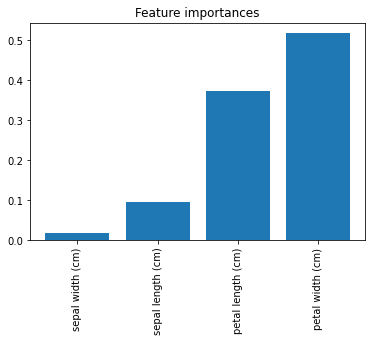

In [8]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

In [9]:
# 실습과제_랜덤 포레스트로 악성.양성 유방암 분류하기

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import pandas as pd

cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.DataFrame(cancer_data.target, columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

y_train = y_train.values.ravel()

model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

predictions, score

(array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0]),
 0.9649122807017544)